In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
	accuracy_score,
	precision_score,
	recall_score,
	f1_score,
	confusion_matrix,
	roc_curve,
	auc,
	classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def carregar_dados_csv(file):

	try:
		
		df_completo = pd.read_csv(file)

		return df_completo

	except FileNotFoundError:

		print(f"Erro: O arquivo '{file}' não foi encontrado.")
		print("Rode o ZeaMays para gerar o arquivo CSV.")
		return None

	except KeyError as e:

		print(f"Erro: Uma ou mais colunas não encontradas no arquivo: {e}")
		return None

	except Exception as e:

		print(f"Ocorreu um erro inesperado: {e}")
		return None

In [4]:
metricas = "df_metricas_seq.csv"

df_metricas = carregar_dados_csv(metricas)

if df_metricas is not None:
	print("\nHead do DataFrame:")
	print(df_metricas.shape)
	print(df_metricas.head())


Head do DataFrame:
(67686, 5766)
   Chr SourceAnnotation                                    COS      Start  \
0    1           APTEdb  Class II subclass 2/Helitron/Helitron  185134318   
1    1           APTEdb  Class II subclass 2/Helitron/Helitron  108502298   
2    9           APTEdb  Class II subclass 2/Helitron/Helitron   77998293   
3    4           APTEdb  Class II subclass 2/Helitron/Helitron  206727217   
4    8           APTEdb  Class II subclass 2/Helitron/Helitron  165674147   

         End Score Strand Phase  \
0  185151509     .      -     .   
1  108504248     .      -     .   
2   78002783     .      +     .   
3  206731508     .      +     .   
4  165674275     .      -     .   

                                          Attributes  \
0  TE-Score=0.714;Software=HelitronScanner;Length...   
1  TE-Score=0.428;Software=HelitronScanner;Length...   
2  TE-Score=0.714;Software=HelitronScanner;Length...   
3  TE-Score=0.428;Software=HelitronScanner;Length...   
4  TE-Score=

In [5]:
remover_colunas = ["Chr", "SourceAnnotation", "Start", "End", "Score", "Strand", "Phase", "Attributes", "label"]

df_modificado = df_metricas.drop(columns=remover_colunas)

print("\nDataFrame após remover colunas:")
print(df_modificado.shape)
print(df_modificado.head())


DataFrame após remover colunas:
(67686, 5757)
                                     COS  ZMays/Agrup\anf_fourier_average  \
0  Class II subclass 2/Helitron/Helitron                      1109.133954   
1  Class II subclass 2/Helitron/Helitron                       146.131903   
2  Class II subclass 2/Helitron/Helitron                       306.033744   
3  Class II subclass 2/Helitron/Helitron                       306.207420   
4  Class II subclass 2/Helitron/Helitron                        11.691824   

   ZMays/Agrup\anf_fourier_median  ZMays/Agrup\anf_fourier_maximum  \
0                       10.007322                     1.881748e+07   
1                        6.389373                     2.643780e+05   
2                        6.873558                     1.326329e+06   
3                        8.069504                     1.260339e+06   
4                        0.949723                     1.346578e+03   

   ZMays/Agrup\anf_fourier_minimum  ZMays/Agrup\anf_fourier_peak  \
0

In [6]:
coluna_alvo = 'COS'

In [7]:
def verfica_unique (df, coluna):
	
	if coluna in df.columns:

		contagem_valores = df[coluna].value_counts()

		print(f"Contagem de cada valor único na coluna '{coluna}':")
		print(contagem_valores)

		valores_unicos = df[coluna].unique()
		print(f"\nValores únicos na coluna '{coluna}':")
		print(valores_unicos)

		numero_de_valores_unicos = df[coluna].nunique()
		print(f"\nA coluna '{coluna}' possui {numero_de_valores_unicos} valores únicos distintos.")

	else:
		print(f"A coluna '{coluna}' não foi encontrada no DataFrame.")
		print("Colunas disponíveis:", df.columns.tolist())

verfica_unique(df_modificado, coluna_alvo)

Contagem de cada valor único na coluna 'COS':
COS
Class I/LTR/Gypsy                         20805
Class I/LTR/Copia                         11109
Class II subclass 2/Helitron/Helitron      5020
Class II subclass 2/MITE/MITE              4357
Class I/LTR/LARD                           3206
Class II subclass 1/TIR/PIF-Harbinger      3033
Class I/LTR/Unknown                        2914
Class II subclass 1/TIR/hAT                2363
Class II subclass 1/TIR/Harbinger          2007
Class II subclass 1/TIR/CMC-EnSpm          1562
Class II subclass 1/TIR/Unknown            1562
Class I/LINE/L1                            1485
Class II subclass 1/TIR/EnSpm-CACTA        1472
Class II subclass 1/TIR/MuDR               1387
Class II subclass 1/TIR/hAT-Ac             1175
Class II subclass 1/TIR/MuLE-MuDR           813
Class I/SINE/tRNA                           530
Class II subclass 1/TIR/TcMar-Stowaway      462
Class II subclass I/TIR/Unknown             401
Class II subclass 1/TIR/Tc1-Mariner   

In [8]:
def extrair_elemento_transponivel(texto):
  
	try:
		return texto.split('/')[1]
	except IndexError:
		return
	
df_modificado[coluna_alvo] = df_modificado[coluna_alvo].apply(extrair_elemento_transponivel)

verfica_unique(df_modificado, coluna_alvo)

Contagem de cada valor único na coluna 'COS':
COS
LTR         38484
TIR         17000
Helitron     5020
MITE         4357
LINE         2089
SINE          736
Name: count, dtype: int64

Valores únicos na coluna 'COS':
['Helitron' 'LINE' 'LTR' 'MITE' 'SINE' 'TIR']

A coluna 'COS' possui 6 valores únicos distintos.


In [12]:
ocorrencia = 1

contagens = df_modificado[coluna_alvo].value_counts()

valores_para_manter = contagens[contagens > ocorrencia].index

df_filtrado = df_modificado[df_modificado[coluna_alvo].isin(valores_para_manter)]

verfica_unique(df_filtrado, coluna_alvo)

Contagem de cada valor único na coluna 'COS':
COS
LTR         38484
TIR         17000
Helitron     5020
MITE         4357
LINE         2089
SINE          736
Name: count, dtype: int64

Valores únicos na coluna 'COS':
['Helitron' 'LINE' 'LTR' 'MITE' 'SINE' 'TIR']

A coluna 'COS' possui 6 valores únicos distintos.


In [ ]:
# import pandas as pd
# import numpy as np

# def preprocessar_dataframe(df):
	
# 	if not isinstance(df, pd.DataFrame):
		
# 		print("Erro: A entrada deve ser um DataFrame do pandas.")
# 		return None

# 	df_processado = df.copy()
# 	print("--- Iniciando Pré-processamento ---")
# 	print(f"Dimensões originais: {df_processado.shape}")

# 	# Remover linhas duplicadas
# 	duplicatas_antes = df_processado.duplicated().sum()
# 	if duplicatas_antes > 0:
# 		df_processado.drop_duplicates(keep='first', inplace=True) # Manter a primeira ocorrência
# 		print(f"   Removidas {duplicatas_antes} linhas duplicadas.")
# 		print(f"   Dimensões atuais: {df_processado.shape}")
# 	else:
# 		print("1. Nenhuma linha duplicada encontrada.")

# 	# Remover linhas onde há valores nulos
# 	linhas_nulas_total_antes = df_processado.isnull().any(axis=1).sum()
	
# 	if linhas_nulas_total_antes > 0:

# 		df_processado.dropna(how='any', inplace=True)
# 		print(f"2. Removidas {linhas_nulas_total_antes} linhas onde havia valores nulos.")
# 		print(f"   Dimensões atuais: {df_processado.shape}")
		
# 	else:
# 		print("2. Nenhuma linha com valores nulos encontrada.")

# 	# Resetar o índice
# 	df_processado.reset_index(drop=True, inplace=True)
# 	print("\n--- Pré-processamento Concluído ---")
# 	print(f"Dimensões finais do DataFrame processado: {df_processado.shape}")

# 	return df_processado

In [10]:
# df = preprocessar_dataframe(df_modificado)

# if df is not None:
# 	print("\nInformações do DataFrame:")
# 	print(df.head())
# 	df.info()

In [14]:
# --- Função Auxiliar para Treinamento, Avaliação e Plotagem ---
def treinar_avaliar_e_plotar(modelo, X_train, y_train, X_test, y_test, nome_modelo, feature_names):
	
	print(f"--- Treinando e Avaliando: {nome_modelo} ---")

	modelo.fit(X_train, y_train)

	y_pred = modelo.predict(X_test)
	y_pred_proba = modelo.predict_proba(X_test) # Probabilidades para a curva ROC

	# Avaliação
	print("\nRelatório de Classificação:")
	print(classification_report(y_test, y_pred))

	accuracy = accuracy_score(y_test, y_pred)
	precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
	recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
	f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

	print(f"Acurácia: {accuracy:.4f}")
	print(f"Precisão (ponderada): {precision:.4f}")
	print(f"Recall (ponderado): {recall:.4f}")
	print(f"F1-Score (ponderado): {f1:.4f}")

	# --- Plotagens ---
	plt.style.use('seaborn-v0_8-whitegrid')

	# Matriz de Confusão
	cm = confusion_matrix(y_test, y_pred)
	plt.figure(figsize=(8, 6))
	sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
				xticklabels=modelo.classes_, yticklabels=modelo.classes_)
	plt.title(f'Matriz de Confusão - {nome_modelo}')
	plt.ylabel('Verdadeiro')
	plt.xlabel('Previsto')
	plt.tight_layout()
	plt.show()

	# Curva ROC e AUC
	# Para multiclasse, a curva ROC é geralmente feita para cada classe (One-vs-Rest)
	# ou uma média. Para simplificar, se for binário, plota a curva para a classe positiva.
	# Se for multiclasse, podemos plotar para cada classe ou pular/adaptar.
	# Assumindo que y_test e classes do modelo estão como 0, 1, ... N-1
	
	n_classes = len(modelo.classes_)
	if n_classes == 2: # Classificação Binária

		y_probs_positive_class = y_pred_proba[:, 1]
		fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive_class, pos_label=modelo.classes_[1])
		roc_auc = auc(fpr, tpr)

		plt.figure(figsize=(8, 6))
		plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
		plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
		plt.xlim([0.0, 1.0])
		plt.ylim([0.0, 1.05])
		plt.xlabel('Taxa de Falsos Positivos (FPR)')
		plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
		plt.title(f'Curva ROC - {nome_modelo}')
		plt.legend(loc="lower right")
		plt.tight_layout()
		plt.show()

	else: # Classificação Multiclasse (exemplo simplificado: micro-average ou pode ser por classe)
		print(f"\n{nome_modelo} é um classificador multiclasse ({n_classes} classes).")
		print("A plotagem da curva ROC para multiclasse pode ser feita por classe (OvR) ou com médias.")
		# Exemplo para plotar ROC para cada classe (One-vs-Rest)
		plt.figure(figsize=(10, 8))
		for i, class_label in enumerate(modelo.classes_):
			fpr, tpr, _ = roc_curve(y_test == class_label, y_pred_proba[:, i])
			roc_auc = auc(fpr, tpr)
			plt.plot(fpr, tpr, lw=2, label=f'ROC Classe {class_label} (AUC = {roc_auc:.2f})')
		
		plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
		plt.xlim([0.0, 1.0])
		plt.ylim([0.0, 1.05])
		plt.xlabel('Taxa de Falsos Positivos (FPR)')
		plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
		plt.title(f'Curva ROC Multiclasse (OvR) - {nome_modelo}')
		plt.legend(loc="lower right")
		plt.tight_layout()
		plt.show()


	# Importância das Features
	if hasattr(modelo, 'feature_importances_'):
		importances = modelo.feature_importances_
		indices = np.argsort(importances)[::-1]
		
		# Limitar o número de features no gráfico para melhor visualização
		num_features_to_plot = min(len(feature_names), 20)
		
		plt.figure(figsize=(12, max(6, num_features_to_plot * 0.3))) # Ajusta altura
		plt.title(f"Importância das Features - {nome_modelo} (Top {num_features_to_plot})")
		sns.barplot(x=importances[indices][:num_features_to_plot],
					y=[feature_names[i] for i in indices[:num_features_to_plot]])
		plt.xlabel("Importância Relativa")
		plt.ylabel("Feature")
		plt.tight_layout()
		plt.show()
	
	print(f"--- Avaliação de {nome_modelo} Concluída ---")
	return modelo # Retorna o modelo treinado


# --- Função para Random Forest ---
def treinar_random_forest(X_train, y_train, X_test, y_test, feature_names, **kwargs_rf):
	
	params_rf = {'n_estimators': 100, 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf':1}
	params_rf.update(kwargs_rf)

	rf_model = RandomForestClassifier(**params_rf)
	
	modelo_treinado = treinar_avaliar_e_plotar(rf_model, X_train, y_train, X_test, y_test, "Random Forest", feature_names)

	return modelo_treinado

# --- Função para XGBoost ---
def treinar_xgboost(X_train, y_train, X_test, y_test, feature_names, **kwargs_xgb):
	
	# Verifica se y_train e y_test são numéricos e não negativos
	if not (np.issubdtype(y_train.dtype, np.number) and np.all(y_train >= 0) and
			np.issubdtype(y_test.dtype, np.number) and np.all(y_test >= 0)):
		print("AVISO XGBoost: y_train e y_test devem ser arrays numéricos com classes codificadas de 0 a N-1.")
		print("         Considere usar sklearn.preprocessing.LabelEncoder na sua variável alvo antes de chamar esta função.")
		

	params_xgb = {
		'n_estimators': 100,
		'random_state': 42,
		'use_label_encoder': False,
		'eval_metric': 'logloss' # ou 'mlogloss' para multiclasse, ou 'auc' etc.
	}
	
	# Se for multiclasse, 'objective' comum é 'multi:softprob'
	num_classes = len(np.unique(y_train))
	if num_classes > 2:
		params_xgb['objective'] = 'multi:softprob' # Retorna probabilidades para cada classe
		params_xgb['eval_metric'] = 'mlogloss'
	else:
		params_xgb['objective'] = 'binary:logistic' # Retorna probabilidade da classe positiva
		params_xgb['eval_metric'] = 'logloss'

	params_xgb.update(kwargs_xgb)

	xgb_model = XGBClassifier(**params_xgb)
	
	modelo_treinado = treinar_avaliar_e_plotar(
		xgb_model, X_train, y_train, X_test, y_test, "XGBoost", feature_names
	)
	return modelo_treinado


Variável Alvo Selecionada: 'COS' (Multiclasse)
--------------------------------------------------

Features (X) após One-Hot Encoding (primeiras linhas):
   ZMays/Agrup\anf_fourier_average  ZMays/Agrup\anf_fourier_median  \
0                      1109.133954                       10.007322   
1                       146.131903                        6.389373   
2                       306.033744                        6.873558   
3                       306.207420                        8.069504   
4                        11.691824                        0.949723   

   ZMays/Agrup\anf_fourier_maximum  ZMays/Agrup\anf_fourier_minimum  \
0                     1.881748e+07                         0.002313   
1                     2.643780e+05                         0.001060   
2                     1.326329e+06                         0.002569   
3                     1.260339e+06                         0.003732   
4                     1.346578e+03                         0.003349  

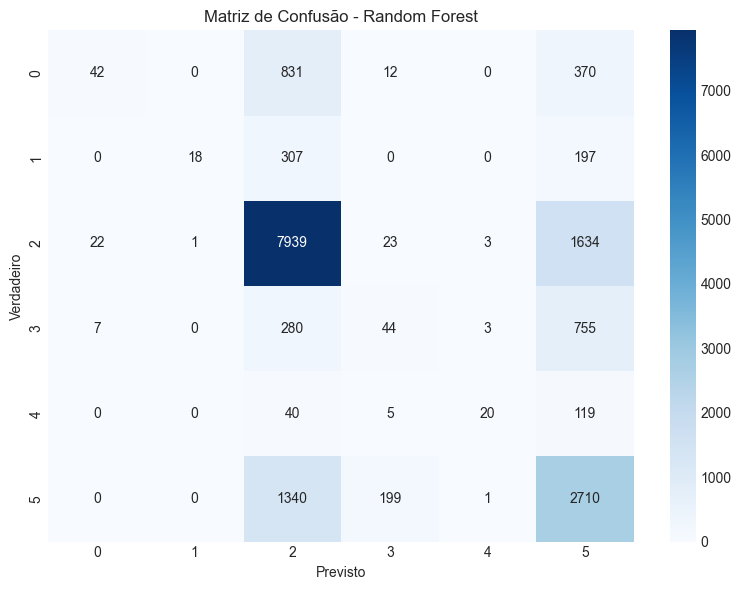


Random Forest é um classificador multiclasse (6 classes).
A plotagem da curva ROC para multiclasse pode ser feita por classe (OvR) ou com médias.


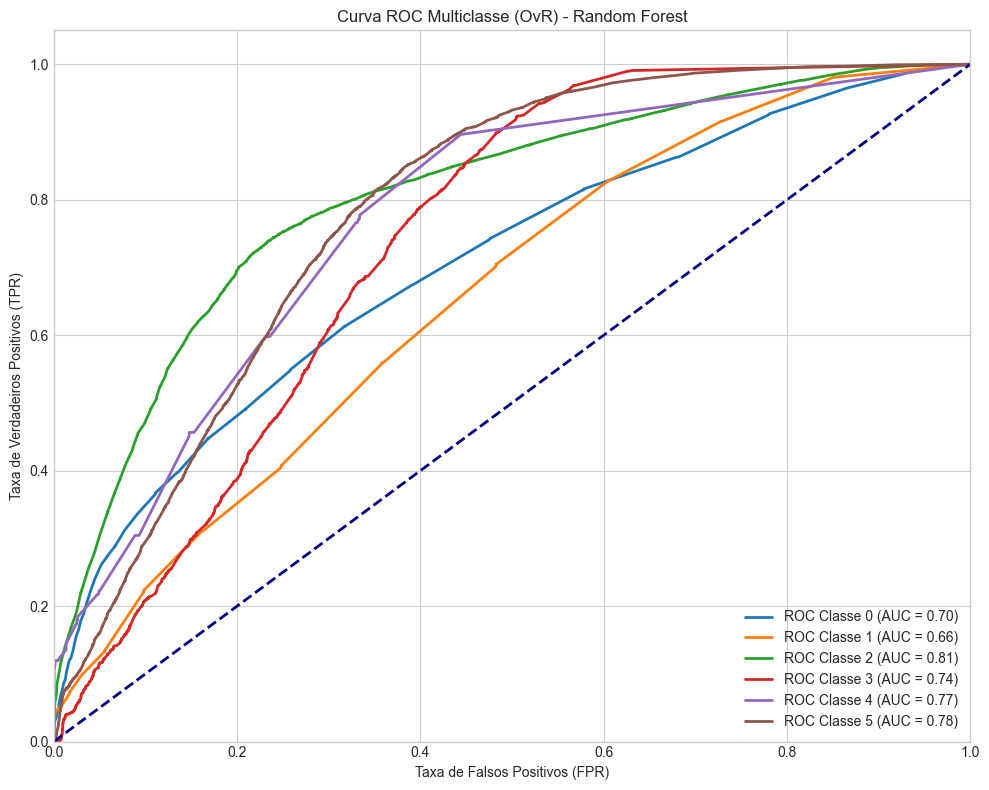

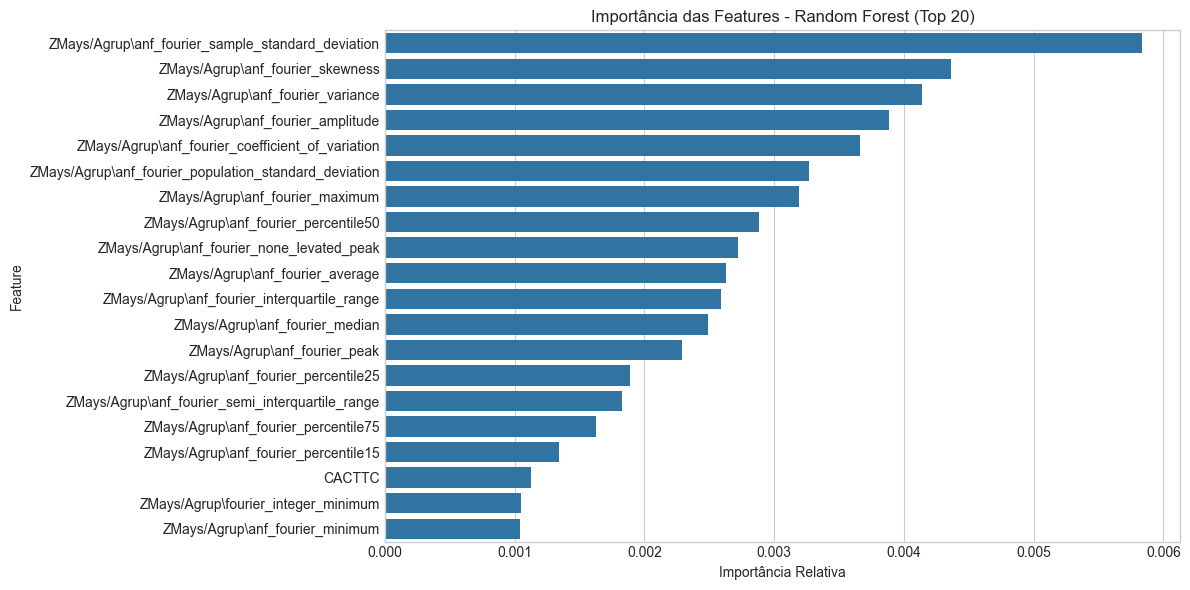

--- Avaliação de Random Forest Concluída ---
--------------------------------------------------
--- Treinando e Avaliando: XGBoost ---


c:\Users\Vinícius\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1255
           1       0.00      0.00      0.00       522
           2       0.71      0.84      0.77      9622
           3       0.69      0.04      0.07      1089
           4       0.50      0.01      0.01       184
           5       0.47      0.61      0.53      4250

    accuracy                           0.63     16922
   macro avg       0.56      0.25      0.23     16922
weighted avg       0.65      0.63      0.58     16922

Acurácia: 0.6328
Precisão (ponderada): 0.6473
Recall (ponderado): 0.6328
F1-Score (ponderado): 0.5763


c:\Users\Vinícius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vinícius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vinícius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

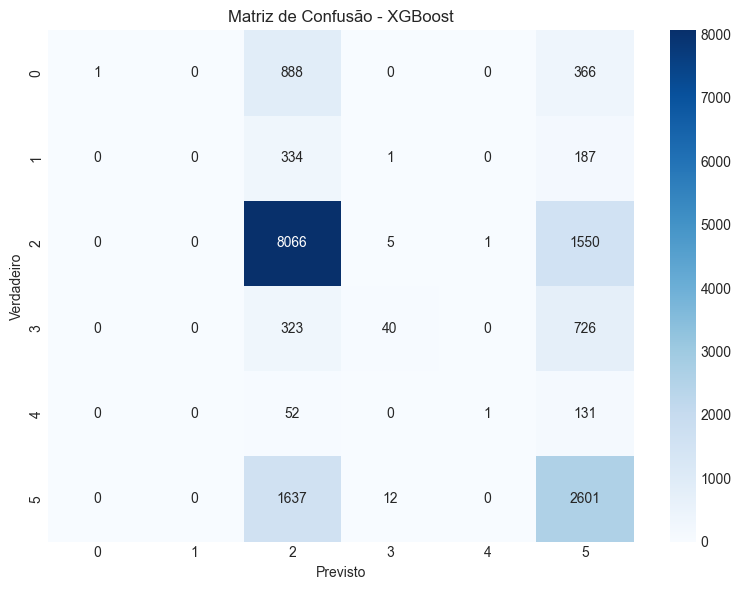


XGBoost é um classificador multiclasse (6 classes).
A plotagem da curva ROC para multiclasse pode ser feita por classe (OvR) ou com médias.


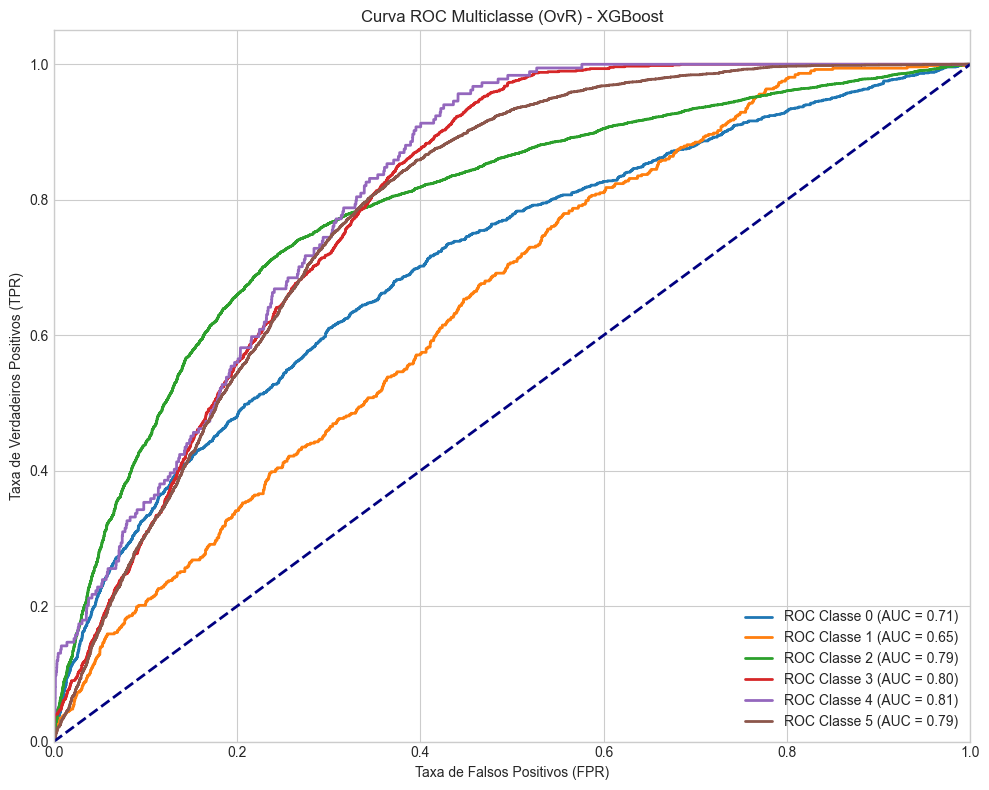

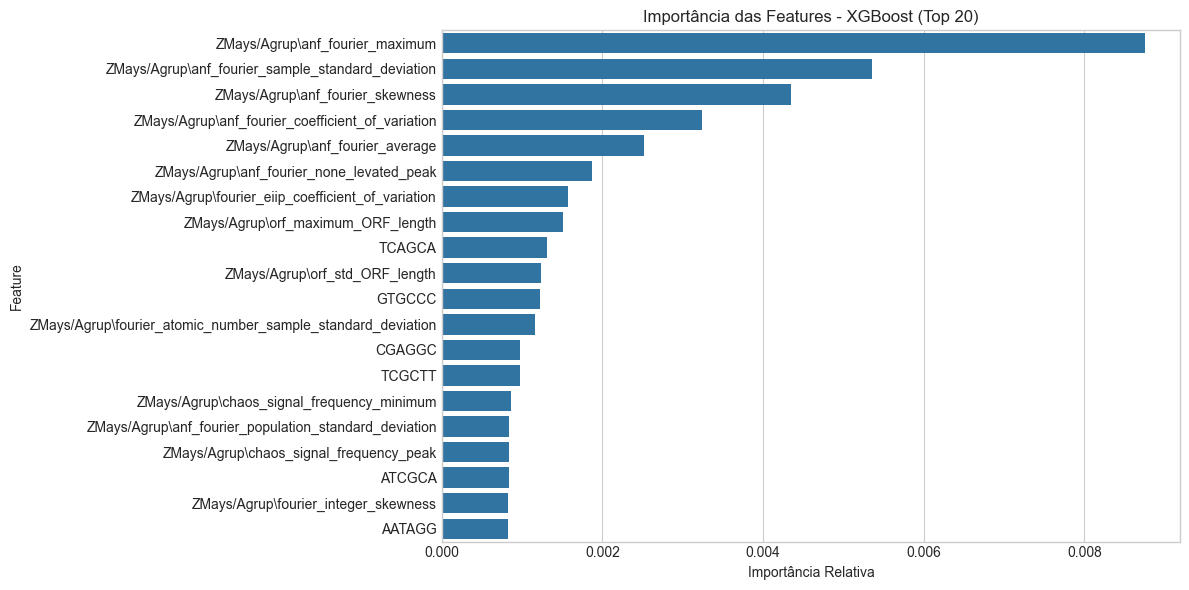

--- Avaliação de XGBoost Concluída ---
--------------------------------------------------

--- Análises Adicionais e Próximos Passos (Relembrando) ---
1. Comparação de Modelos.
2. Otimização de Hiperparâmetros (GridSearchCV, RandomizedSearchCV).
3. Validação Cruzada (Cross-Validation).
4. Análise de Erros (Matriz de Confusão).
5. Engenharia de Features.


In [15]:
nome_coluna_alvo = 'COS'

df_modelo = df_filtrado.copy()

# Amostragem de 10% do DataFrame filtrado para um pseudo-treinamento
# df_modelo = df_filtrado.sample(frac=0.02, random_state=42)

if nome_coluna_alvo not in df_modelo.columns:

	print(f"ERRO: Coluna alvo '{nome_coluna_alvo}' não encontrada no DataFrame!")
	
else:

	y_original = df_modelo[nome_coluna_alvo]
	X_original = df_modelo.drop(columns=[nome_coluna_alvo])
	
	print(f"\nVariável Alvo Selecionada: '{nome_coluna_alvo}' (Multiclasse)")
	print("-" * 50)

	# Codificar Features Categóricas em X (One-Hot Encoding)
	colunas_categoricas_X = X_original.select_dtypes(include=['object', 'category']).columns
	X_codificado = pd.get_dummies(X_original, columns=colunas_categoricas_X, drop_first=True)
	feature_names = X_codificado.columns.tolist()

	print("\nFeatures (X) após One-Hot Encoding (primeiras linhas):")
	print(X_codificado.head())
	print(f"Número de features após encoding: {X_codificado.shape[1]}")
	print("-" * 50)

	# Codificar Variável Alvo (y) para formato numérico 0..N-1
	le = LabelEncoder()
	y_codificada = le.fit_transform(y_original) # Converte strings/categorias para 0, 1, 2...
	
	print(f"\nCodificação da Variável Alvo '{nome_coluna_alvo}':")
	print("Classes originais:", le.classes_)
	print("Classes codificadas (únicas):", np.unique(y_codificada))
	print("Alvo (y) após codificação (primeiras ocorrências):", y_codificada[:5])
	print("-" * 50)

	# Dividir em Dados de Treino e Teste
	try:

		X_train, X_test, y_train, y_test = train_test_split(X_codificado, y_codificada, test_size=0.25, random_state=42, stratify=y_codificada)

	except ValueError:

		print("Aviso: Não foi possível usar 'stratify'. Tentando sem.")

		X_train, X_test, y_train, y_test = train_test_split(X_codificado, y_codificada, test_size=0.25, random_state=42)

	print(f"\nDimensões dos conjuntos de treino/teste estabelecidas.")
	print("-" * 50)

	# Treinar e Avaliar Modelos
	
	# Random Forest

	modelo_rf_final = treinar_random_forest(
		X_train, y_train, X_test, y_test, feature_names,
		n_estimators=120, class_weight='balanced'
	)
	
	print("-" * 50)
	
	# XGBoost
	modelo_xgb_final = treinar_xgboost(X_train, y_train, X_test, y_test, feature_names,
									   n_estimators=120, learning_rate=0.1, max_depth=4)
	print("-" * 50)

	print("\n--- Análises Adicionais e Próximos Passos (Relembrando) ---")
	print("1. Comparação de Modelos.")
	print("2. Otimização de Hiperparâmetros (GridSearchCV, RandomizedSearchCV).")
	print("3. Validação Cruzada (Cross-Validation).")
	print("4. Análise de Erros (Matriz de Confusão).")
	print("5. Engenharia de Features.")

In [ ]:
# Exemplo com Pseudo-Resultados (para fins de demonstração):

# Random Forest

# Acurácia: 0.3077
# Precisão (ponderada): 0.1564
# Recall (ponderado): 0.3077
# F1-Score (ponderado): 0.1695
# Tempo de Treinamento: 2 minutos

# XGBoost
# Acurácia: 0.2912
# Precisão (ponderada): 0.1794
# Recall (ponderado): 0.2912
# F1-Score (ponderado): 0.2035
# Tempo de Treinamento: 30 minutos